# RNA Energy Barriers Exploration

This notebook explores the implementation of RNA structure manipulation and path finding algorithms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display

import RNA #pip install viennarna

from src.rna_structure import RNAStructure
from src.path_finding import find_direct_path
from src.energy import base_pair_minimization_energy, turner_energy
import src.example_rna as ex

%load_ext autoreload
%autoreload 2

## 1. Testing Basic RNA Structure Operations

Sequence: GGGAAACCC
Structure: (((...)))
Base pairs: {(1, 7), (2, 6), (0, 8)}


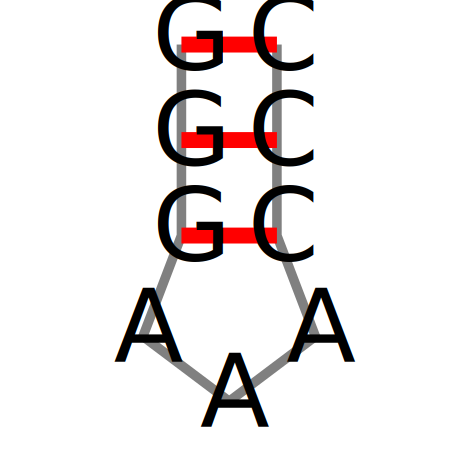

In [6]:
# Create a simple RNA structure
sequence = "GGGAAACCC"
structure = "(((...)))"

rna = RNAStructure(sequence, structure)
print(f"Sequence: {sequence}")
print(f"Structure: {structure}")
print(f"Base pairs: {rna.base_pairs}")

RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp.svg")
SVG("tmp.svg")

## 2. Testing Structure Manipulation

Initial structure: .........
After adding (0,8): (.......)


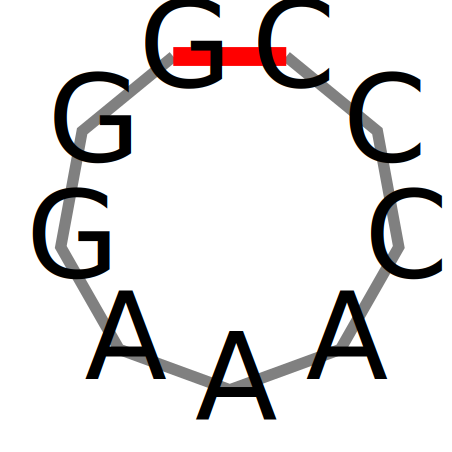

In [7]:
# Test adding and removing base pairs
rna2 = RNAStructure(sequence)
structure = rna2.to_dotbracket()
print("Initial structure:", structure)
RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp0.svg")
SVG("tmp0.svg")

rna2.add_pair(0, 8)
structure = rna2.to_dotbracket()
print("After adding (0,8):", structure)
RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp1.svg")
SVG("tmp1.svg")

After adding (1,7): ((.....))


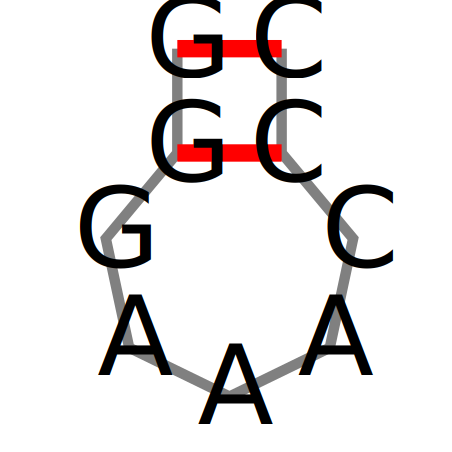

In [8]:
rna2.add_pair(1, 7)
structure = rna2.to_dotbracket()
print("After adding (1,7):", structure)
RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp2.svg")
SVG("tmp2.svg")

After removing (0,8): .(.....).


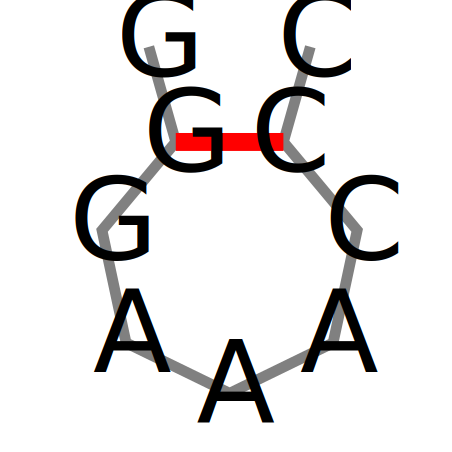

In [9]:
rna2.remove_pair(0, 8)
structure = rna2.to_dotbracket()
print("After removing (0,8):", structure)
RNA.svg_rna_plot(sequence, structure=structure, ssfile="tmp3.svg")
SVG("tmp3.svg")

## 3. Testing Path Finding

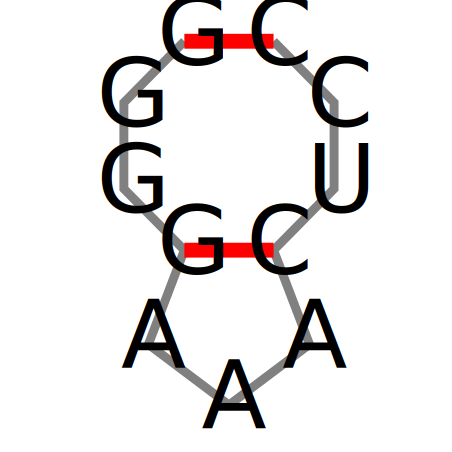

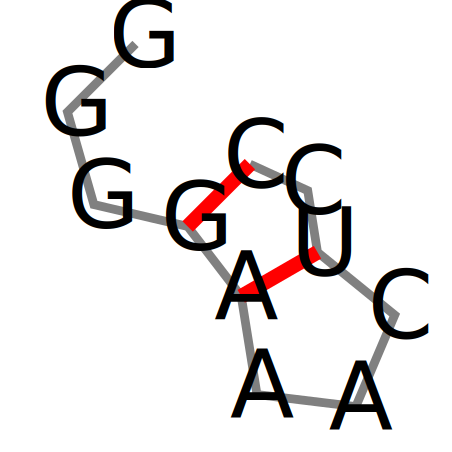

Direct path:
Step 0: (..(...)..)


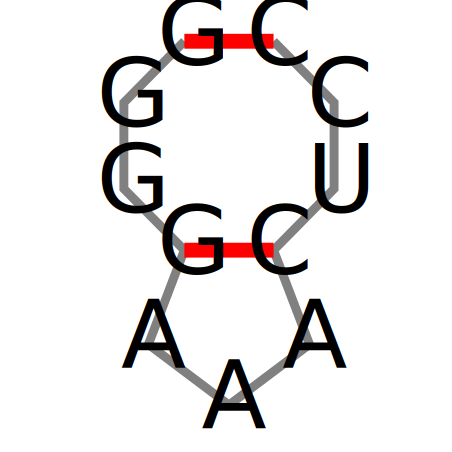

Step 1: (.........)


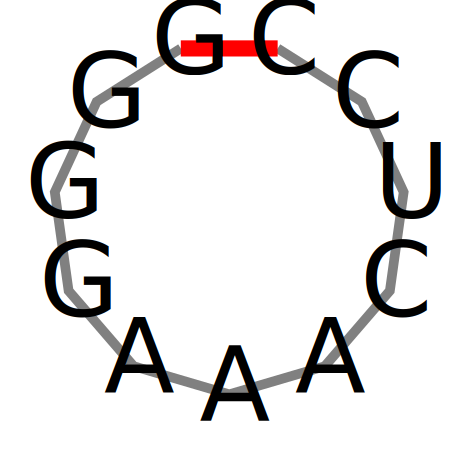

Step 2: ...........


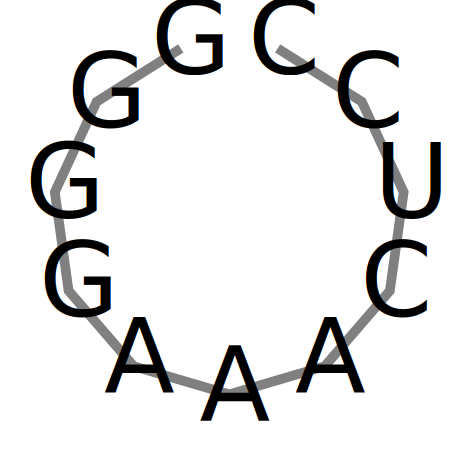

Step 3: ...(......)


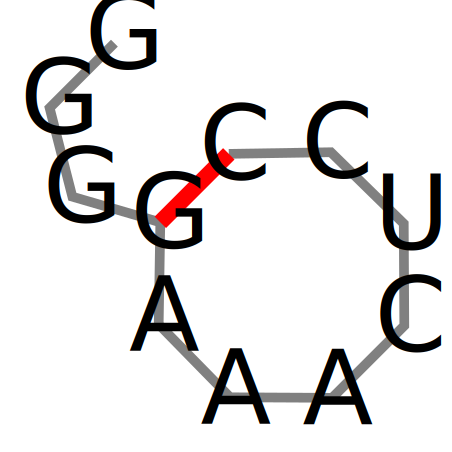

Step 4: ...((...).)


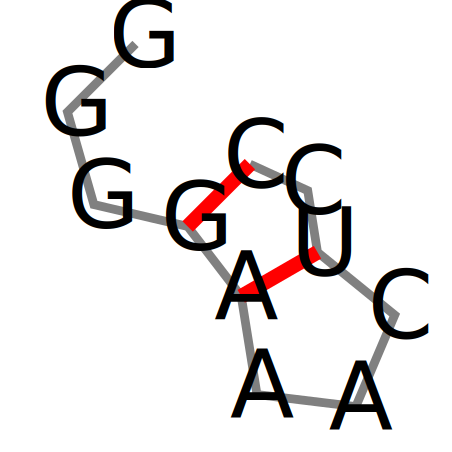

In [10]:
# Define start and end structures
sequence = "GGGGAAACUCC"
start_struct = "(..(...)..)"
end_struct = "...((...).)"  # A different valid structure

RNA.svg_rna_plot(sequence, structure=start_struct, ssfile="tmp_start.svg")
RNA.svg_rna_plot(sequence, structure=end_struct, ssfile="tmp_end.svg")

start = RNAStructure(sequence, start_struct)
end = RNAStructure(sequence, end_struct)

display(SVG("tmp_start.svg"), SVG("tmp_end.svg"))

# Find direct path
direct_path = find_direct_path(start, end)
print("Direct path:")
for i, struct in enumerate(direct_path):
    print(f"Step {i}: {struct.to_dotbracket()}")
    RNA.svg_rna_plot(sequence, structure=struct.to_dotbracket(), ssfile=f"tmp.svg")
    display(SVG(f"tmp.svg"))
   


## 4. Analyzing Energy Barriers

For now, we're using a simple energy model (negative number of base pairs). Later we'll integrate with ViennaRNA for more accurate energy calculations.

In [11]:
def plot_energy_profile(energies):      
    plt.figure(figsize=(10, 6))
    plt.plot(energies, '-o')
    plt.xlabel('Step')
    plt.ylabel('Energy')
    plt.title('Energy Profile Along Folding Path')
    plt.grid(True)
    plt.show()
    
    return max(energies) - energies[0]  # barrier height

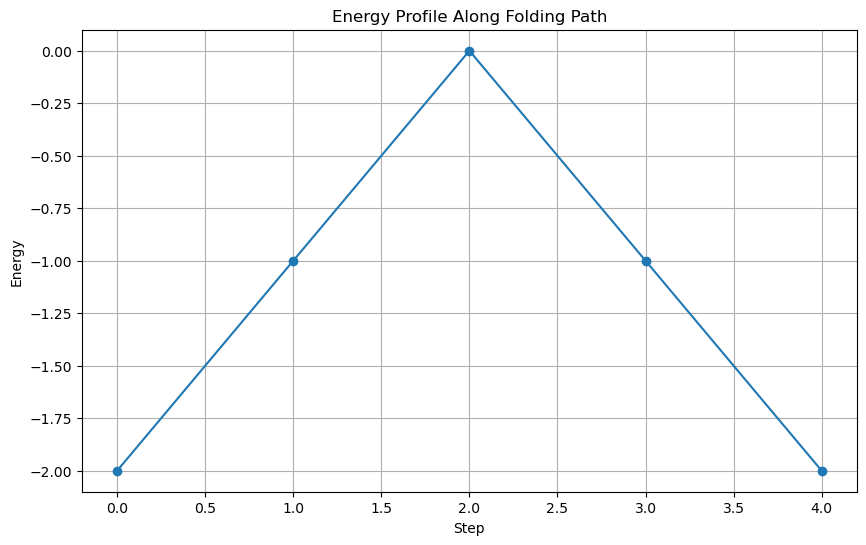

Direct path barrier: 2


In [12]:
bpm_energies = [base_pair_minimization_energy(s) for s in direct_path]
print("Direct path barrier:", plot_energy_profile(bpm_energies))

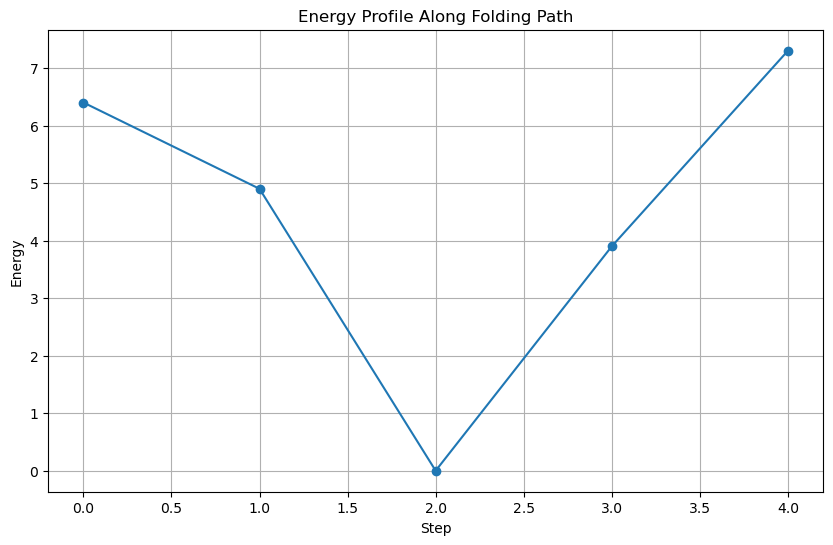

0.9000000953674316

In [13]:
fold_compound = RNA.fold_compound(sequence)
turner_energies = [turner_energy(fold_compound, s.to_dotbracket()) for s in direct_path]

plot_energy_profile(turner_energies)

## 5. Testing longer example as with indirect heuristic

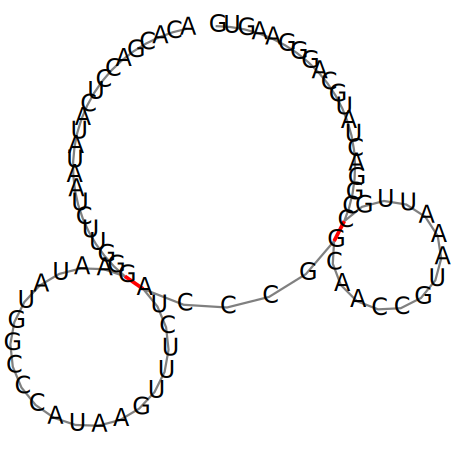

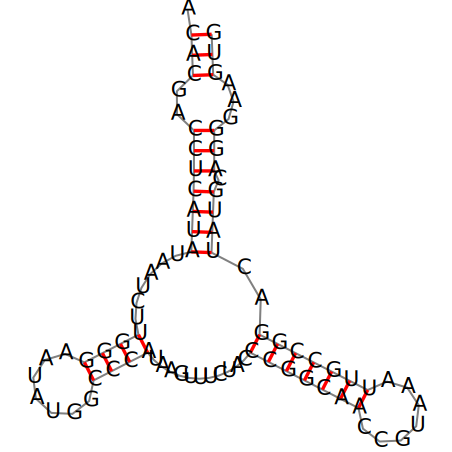

Direct path lenth: 22


In [14]:
# Define start and end structures
seq = "ACACGACCUCAUAUAAUCUUGGGAAUAUGGCCCAUAAGUUUCUACCCGGCAACCGUAAAUUGCCGGACUAUGCAGGGAAGUG"
start_struct = "......................(....................)....(.............)..................."
end_struct = ".(((..(((((((......((((.......))))...........(((((((.......)))))))..)))).)))...)))"  # target structure

RNA.svg_rna_plot(seq, structure=start_struct, ssfile="tmp_start.svg")
RNA.svg_rna_plot(seq, structure=end_struct, ssfile="tmp_end.svg")

start = RNAStructure(seq, start_struct)
end = RNAStructure(seq, end_struct)

display(SVG("tmp_start.svg"), SVG("tmp_end.svg"))

# Find direct path
direct_path = find_direct_path(start, end)
print(f"Direct path lenth: {len(direct_path)}")

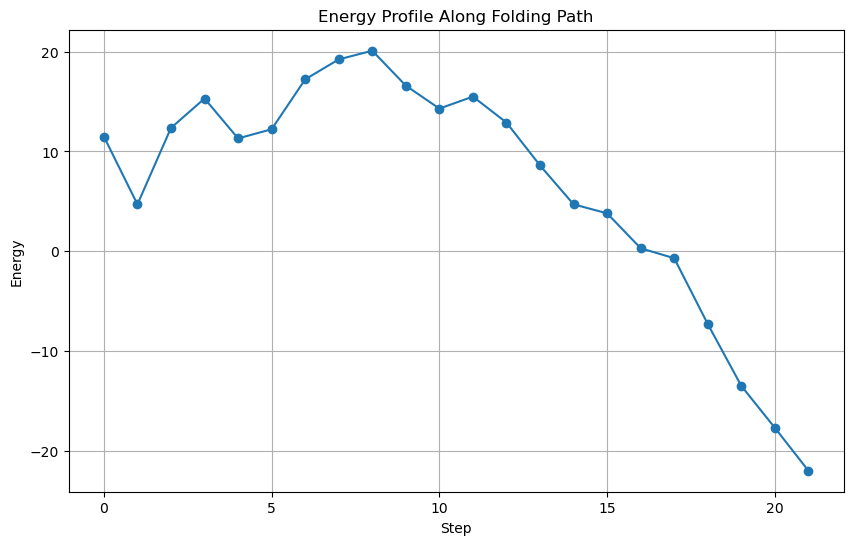

8.600000381469727

In [15]:
fold_compound = RNA.fold_compound(seq)
turner_energies = [turner_energy(fold_compound, s.to_dotbracket()) for s in direct_path]

plot_energy_profile(turner_energies)

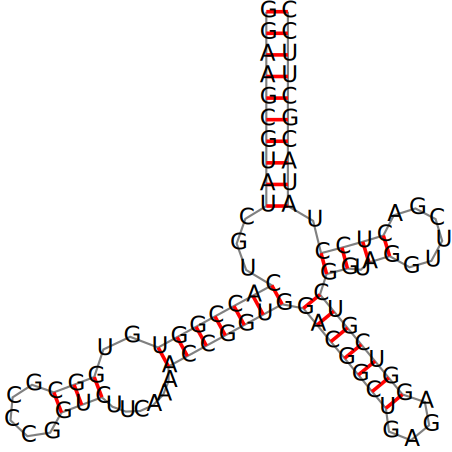

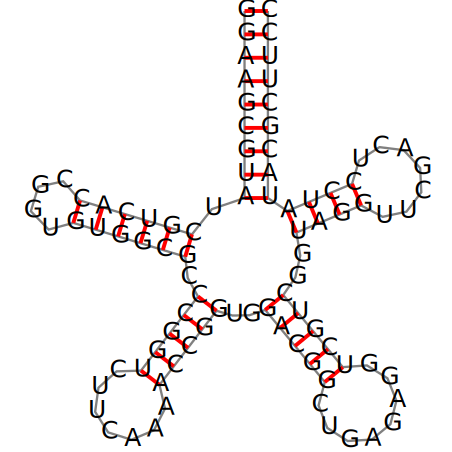

Direct path lenth: 33


In [3]:
# Define start and end structures
seq = ex.MED_SEQ
start_struct = ex.MED_START_STRUCT
end_struct = ex.MED_END_STRUCT  # target structure

RNA.svg_rna_plot(seq, structure=start_struct, ssfile="tmp_start.svg")
RNA.svg_rna_plot(seq, structure=end_struct, ssfile="tmp_end.svg")

start = RNAStructure(seq, start_struct)
end = RNAStructure(seq, end_struct)

display(SVG("tmp_start.svg"), SVG("tmp_end.svg"))

# Find direct path
direct_path = find_direct_path(start, end)
print(f"Direct path lenth: {len(direct_path)}")

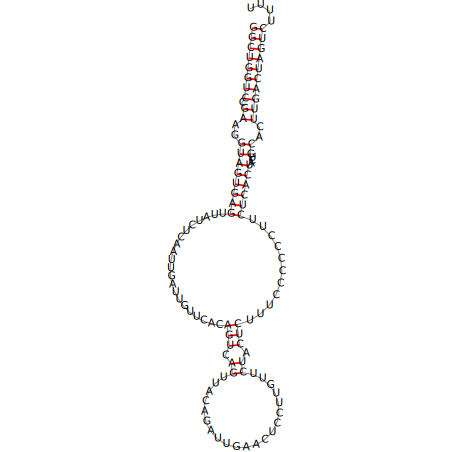

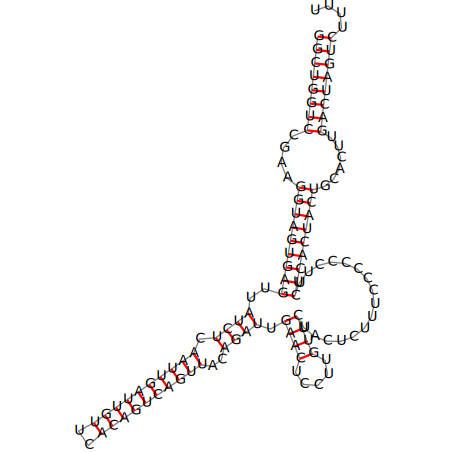

Direct path lenth: 31


In [2]:
# Define start and end structures
seq = ex.VLONG_SEQ
start_struct = ex.VLONG_START_STRUCT
end_struct = ex.VLONG_END_STRUCT  # target structure

RNA.svg_rna_plot(seq, structure=start_struct, ssfile="tmp_start.svg")
RNA.svg_rna_plot(seq, structure=end_struct, ssfile="tmp_end.svg")

start = RNAStructure(seq, start_struct)
end = RNAStructure(seq, end_struct)

display(SVG("tmp_start.svg"), SVG("tmp_end.svg"))

# Find direct path
direct_path = find_direct_path(start, end)
print(f"Direct path lenth: {len(direct_path)}")

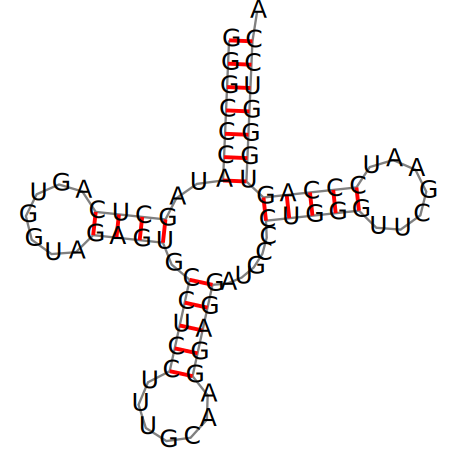

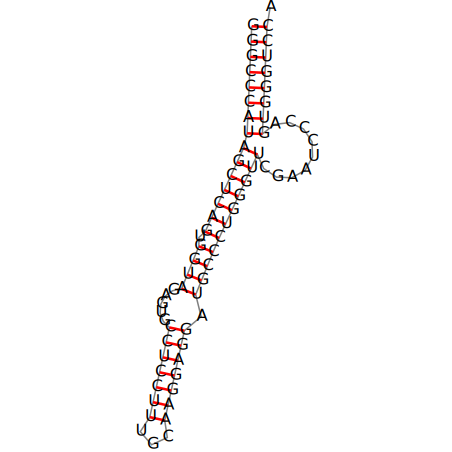

Direct path lenth: 24


In [3]:
# Define start and end structures
seq = ex.ANOTHER_SEQ
start_struct = ex.ANOTHER_START_STRUCT
end_struct = ex.ANOTHER_END_STRUCT  # target structure

RNA.svg_rna_plot(seq, structure=start_struct, ssfile="tmp_start.svg")
RNA.svg_rna_plot(seq, structure=end_struct, ssfile="tmp_end.svg")

start = RNAStructure(seq, start_struct)
end = RNAStructure(seq, end_struct)

display(SVG("tmp_start.svg"), SVG("tmp_end.svg"))

# Find direct path
direct_path = find_direct_path(start, end)
print(f"Direct path lenth: {len(direct_path)}")

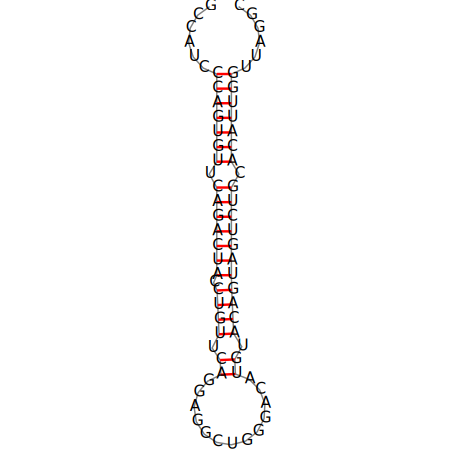

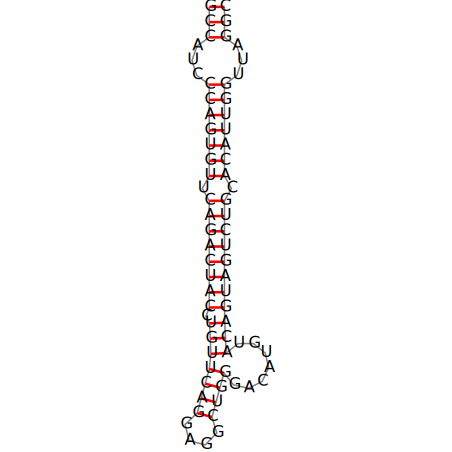

Direct path lenth: 12


In [4]:
# Define start and end structures
seq = ex.MOD_SEQ
start_struct = ex.MOD_START_STRUCT
end_struct = ex.MOD_END_STRUCT  # target structure

RNA.svg_rna_plot(seq, structure=start_struct, ssfile="tmp_start.svg")
RNA.svg_rna_plot(seq, structure=end_struct, ssfile="tmp_end.svg")

start = RNAStructure(seq, start_struct)
end = RNAStructure(seq, end_struct)

display(SVG("tmp_start.svg"), SVG("tmp_end.svg"))

# Find direct path
direct_path = find_direct_path(start, end)
print(f"Direct path lenth: {len(direct_path)}")